In [ ]:
# 1. Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

📊 Kích thước train: (4459, 2)
📊 Kích thước test: (1115, 2)

🔎 Các cột train: ['sms', 'label']
🔎 Các cột test : ['id', 'sms']

📌 Thống kê nhãn:
label
0    3861
1     598
Name: count, dtype: int64


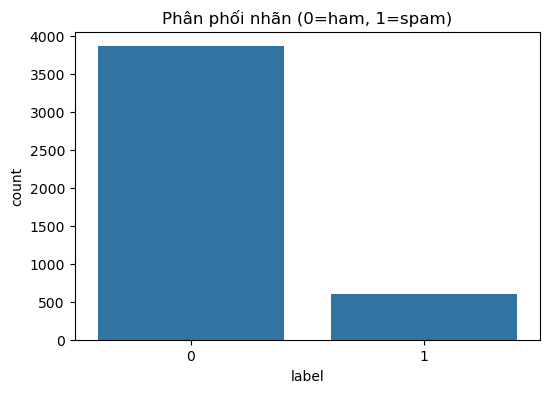


✏️ Độ dài trung bình tin nhắn: 80.96927562233685


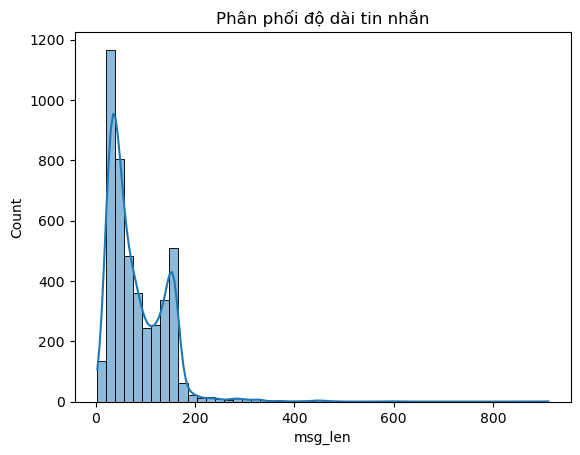

In [ ]:
# 2. Khám phá dữ liệu
train_df = pd.read_csv("E:/btlhocmay/train.csv")  
test_df  = pd.read_csv("E:/btlhocmay/test.csv")
print("📊 Kích thước train:", train_df.shape)
print("📊 Kích thước test:", test_df.shape)
print("\n🔎 Các cột train:", train_df.columns.tolist())
print("🔎 Các cột test :", test_df.columns.tolist())

# Phân phối nhãn
print("\n📌 Thống kê nhãn:")
print(train_df["label"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=train_df)
plt.title("Phân phối nhãn (0=ham, 1=spam)")
plt.show()

# Độ dài tin nhắn
train_df["msg_len"] = train_df["sms"].apply(len)
print("\n✏️ Độ dài trung bình tin nhắn:", train_df["msg_len"].mean())

sns.histplot(train_df["msg_len"], bins=50, kde=True)
plt.title("Phân phối độ dài tin nhắn")
plt.show()

In [ ]:
# 3. Tiền xử lý văn bản
def clean_text(text):
    text = str(text).lower()                           # lowercase
    text = re.sub(r"\d+", "", text)                   # bỏ số
    text = text.translate(str.maketrans("", "", string.punctuation)) # bỏ dấu câu
    text = re.sub(r"\s+", " ", text).strip()          # bỏ khoảng trắng thừa
    return text

train_df["clean_text"] = train_df["sms"].apply(clean_text)
test_df["clean_text"]  = test_df["sms"].apply(clean_text)

print("\n🔎 Ví dụ sau khi làm sạch:")
print(train_df[["sms", "clean_text"]].head())


🔎 Ví dụ sau khi làm sạch:
                                                 sms  \
0                 Ok i am on the way to home hi hi\n   
1  Ur balance is now £500. Ur next question is: W...   
2  I'm tired of arguing with you about this week ...   
3    Tell them the drug dealer's getting impatient\n   
4  Hmmm... Guess we can go 4 kb n power yoga... H...   

                                          clean_text  
0                   ok i am on the way to home hi hi  
1  ur balance is now £ ur next question is who sa...  
2  im tired of arguing with you about this week a...  
3       tell them the drug dealers getting impatient  
4  hmmm guess we can go kb n power yoga haha dunn...  


In [ ]:
# 4. Vector hóa văn bản (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

X_tfidf = tfidf_vectorizer.fit_transform(train_df["clean_text"])
y = train_df["label"]

X_test_tfidf = tfidf_vectorizer.transform(test_df["clean_text"])

In [ ]:
# 5. Huấn luyện mô hình
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train, y_train)
MultinomialNB().fit(X_train, y_train)

MultinomialNB()


🔹 Accuracy: 0.984304932735426

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       772
           1       1.00      0.88      0.94       120

    accuracy                           0.98       892
   macro avg       0.99      0.94      0.96       892
weighted avg       0.98      0.98      0.98       892



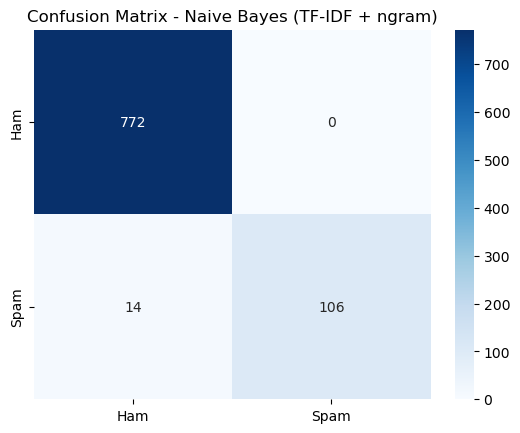

In [ ]:
# 6. Đánh giá mô hình
y_pred_val = nb_model.predict(X_val)

print("\n🔹 Accuracy:", accuracy_score(y_val, y_pred_val))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred_val))

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.title("Confusion Matrix - Naive Bayes (TF-IDF)")
plt.show()

In [ ]:
test_pred = nb_model.predict(X_test_tfidf)

submission = pd.DataFrame({
    "id": test_df["id"],
    "lacondconbel": test_pred
})

submission.to_csv("E:/btlhocmay/submission.csv", index=False, encoding="utf-8-sig")
print("✅ Đã lưu file submission.csv vào E:/btlhocmay/")

✅ Đã lưu file submission.csv vào E:/btlhocmay/
